<a href="https://colab.research.google.com/github/bulutirm/NLP-Application/blob/main/NLP_Hugging_Transform_Uygulamalar%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NER

In [28]:
from transformers import pipeline

In [29]:
#NER (Named Entity Recognition)
ner_pipeline = pipeline('ner', model='savasy/bert-base-turkish-ner-cased', tokenizer='savasy/bert-base-turkish-ner-cased')

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of the model checkpoint at savasy/bert-base-turkish-ner-cased were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [30]:
text = "Yunus Emre İstanbul'a gitti"
ner_results = ner_pipeline(text)
print(ner_results)

[{'entity': 'B-PER', 'score': 0.99909115, 'index': 1, 'word': 'Yunus', 'start': 0, 'end': 5}, {'entity': 'I-PER', 'score': 0.9988813, 'index': 2, 'word': 'Emre', 'start': 6, 'end': 10}, {'entity': 'B-LOC', 'score': 0.99262005, 'index': 3, 'word': 'İstanbul', 'start': 11, 'end': 19}]


In [31]:
for result in ner_results:
    print(f"Varlık: {result['word']}, Etkiket: {result['entity']}, Güven: {result['score']:.4f}")

Varlık: Yunus, Etkiket: B-PER, Güven: 0.9991
Varlık: Emre, Etkiket: I-PER, Güven: 0.9989
Varlık: İstanbul, Etkiket: B-LOC, Güven: 0.9926


#Türkçe-İngilizce, İngilizce-Türkçe Çeviri Sistemleri

In [32]:
from transformers import pipeline

In [33]:
translator = pipeline('translation', model='Helsinki-NLP/opus-mt-tr-en')

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [34]:
turkish_text = "Merhaba, nasılsınız?"
english_translation = translator(turkish_text, max_length=50)

In [35]:
print("Türkçe Cümle:", turkish_text)
print("İngilizce Çeviri:", english_translation[0]["translation_text"])

Türkçe Cümle: Merhaba, nasılsınız?
İngilizce Çeviri: Hi, how are you?


In [11]:
from transformers import MarianMTModel, MarianTokenizer

In [12]:
model_name = "Helsinki-NLP/opus-mt-tc-big-en-tr"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/833k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

In [13]:
metinler = [
    "I know Hakan didn't want to eat that.",
    "On Sunday, we would get up early and go fishing."
]

In [14]:
translated = model.generate(**tokenizer(metinler, return_tensors="pt", padding=True))
for t in translated:
  print(tokenizer.decode(t, skip_special_tokens=True))

Hakan'ın bunu yemek istemediğini biliyorum.
Pazar günü erken kalkıp balık tutmaya giderdik.


#Metin Özetleme

In [16]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

In [23]:
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [24]:
input_text = """
Hugging Face, Inc. is a company that provides a large collection of natural language processing models and datasets.
The company is best know for its open-source platform called Transformers,
which offers a variety of pre-trained models for task such as text classification, translation, summarization, and more.
"""

In [25]:
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

In [26]:
summary_ids = model.generate(input_ids)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [27]:
summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [28]:
print("Orijinal Metin:\n", input_text)
print("Özetlenmiş Metin:\n", summary_text)

Orijinal Metin:
 
Hugging Face, Inc. is a company that provides a large collection of natural language processing models and datasets.
The company is best know for its open-source platform called Transformers,
which offers a variety of pre-trained models for task such as text classification, translation, summarization, and more.

Özetlenmiş Metin:
 is a company that provides a large collection of natural language processing models and datasets


In [29]:
import torch
from transformers import BertTokenizerFast, EncoderDecoderModel

In [30]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [31]:
ckpt = 'mrm8488/bert2bert_shared-turkish-summarization'

In [32]:
tokenizer = BertTokenizerFast.from_pretrained(ckpt)
model = EncoderDecoderModel.from_pretrained(ckpt).to(device)

tokenizer_config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']


In [34]:
def generate_summary(text):
  inputs = tokenizer([text], padding="max_length", truncation=True, max_length=512, return_tensors="pt")
  input_ids = inputs.input_ids.to(device)
  attintion_mask = inputs.attention_mask.to(device)
  output = model.generate(input_ids, attention_mask=attintion_mask)
  return tokenizer.decode(output[0], skip_special_tokens=True)

In [35]:
text = """
Ankara'da oto hırsızlık çeteşine yönelik düzenlenen 'Balta' operasyonunda, çete lide 'Balta' lakaplı şahıs ile 7 kişi göz altına alındı.
"""

In [36]:
generate_summary(text)

"Ankara'da oto hırsızlık çeteşine yönelik düzenlenen operasyonda çete lide'Balta'lakaplı şahıs ile 7 kişi göz altına alındı"

#Text To Speech

In [40]:
from transformers import VitsModel, AutoTokenizer
import torch
import scipy
from scipy.io.wavfile import write

In [41]:
model = VitsModel.from_pretrained("facebook/mms-tts-tur")
tokenizer = AutoTokenizer.from_pretrained("facebook/mms-tts-tur")

config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/mms-tts-tur were not used when initializing VitsModel: ['flow.flows.0.wavenet.in_layers.0.weight_g', 'flow.flows.0.wavenet.in_layers.0.weight_v', 'flow.flows.0.wavenet.in_layers.1.weight_g', 'flow.flows.0.wavenet.in_layers.1.weight_v', 'flow.flows.0.wavenet.in_layers.2.weight_g', 'flow.flows.0.wavenet.in_layers.2.weight_v', 'flow.flows.0.wavenet.in_layers.3.weight_g', 'flow.flows.0.wavenet.in_layers.3.weight_v', 'flow.flows.0.wavenet.res_skip_layers.0.weight_g', 'flow.flows.0.wavenet.res_skip_layers.0.weight_v', 'flow.flows.0.wavenet.res_skip_layers.1.weight_g', 'flow.flows.0.wavenet.res_skip_layers.1.weight_v', 'flow.flows.0.wavenet.res_skip_layers.2.weight_g', 'flow.flows.0.wavenet.res_skip_layers.2.weight_v', 'flow.flows.0.wavenet.res_skip_layers.3.weight_g', 'flow.flows.0.wavenet.res_skip_layers.3.weight_v', 'flow.flows.1.wavenet.in_layers.0.weight_g', 'flow.flows.1.wavenet.in_layers.0.weight_v', 'flow.flows.1.wavenet.in_layers.1.wei

tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/476 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

In [54]:
metin = "Merhaba nasılsın"
girdiler = tokenizer(metin, return_tensors="pt")

In [55]:
with torch.no_grad():
  output = model(**girdiler).waveform

In [56]:
from IPython.display import Audio

In [57]:
Audio(output, rate=model.config.sampling_rate)

#Metin Benzerliği Ölçme

In [59]:
from transformers import BertTokenizer, BertModel
import torch
from scipy.spatial.distance import cosine

In [60]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [61]:
text1 = "Bu bir örnek cümle."
text2 = "Bu bir farklı cümle."

In [62]:
inputs1 = tokenizer(text1, return_tensors="pt")
inputs2 = tokenizer(text2, return_tensors="pt")

In [63]:
with torch.no_grad():
  outputs1 = model(**inputs1).last_hidden_state.mean(dim=1).squeeze()
  outputs2 = model(**inputs2).last_hidden_state.mean(dim=1).squeeze()

In [64]:
similarity_score = 1 - cosine(outputs1, outputs2)

In [65]:
print(f"Metin benzerliği skoru: {similarity_score.item()}")

Metin benzerliği skoru: 0.7935188412666321


#Text To Image

In [1]:
from transformers import pipeline

In [2]:
translator = pipeline('translation', model='Helsinki-NLP/opus-mt-tr-en')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/307M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/840k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.56M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [3]:
prompt = input("Resim açıklaması : ")
ingilizceprompt = translator(prompt, max_length=150)
print(ingilizceprompt[0]["translation_text"])

Resim açıklaması : kediler çay içiyor. masada bir çok tatlı bulunuyor.
The cats are having tea. There are lots of desserts on the table.


In [4]:
pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.4 MB/s eta 0:00:00


In [5]:
from diffusers import StableDiffusionXLPipeline
import torch
import cv2
from torchvision.transforms import ToTensor

In [6]:
pipe = StableDiffusionXLPipeline.from_pretrained("segmind/Segmind-Vega", torch_dtype=torch.float32, use_safetensors=True, variant="fp16")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/740 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/891 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.49G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
prompt=ingilizceprompt[0]["translation_text"]
neg_prompt = "(worst quality, low quality, illustration, 3d, 2d, painting, cartoons, sketch)"

In [8]:
print(prompt)

The cats are having tea. There are lots of desserts on the table.


In [9]:
image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [24]:
image_tensor = ToTensor()(image)

In [25]:
image_np = image_tensor.cpu().numpy()

In [26]:
from google.colab.patches import cv2_imshow

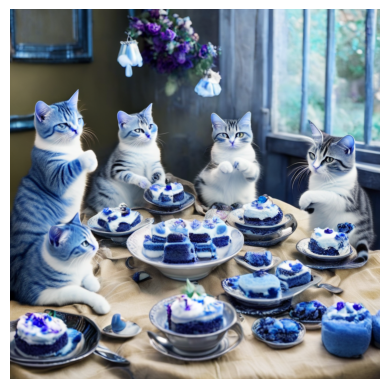

In [27]:
import cv2
import matplotlib.pyplot as plt

# OpenCV görüntüsünü dönüştürme
image_np = cv2.cvtColor(image_np.transpose(1, 2, 0), cv2.COLOR_RGB2BGR)

# Görüntüyü matplotlib kullanarak görüntüleme
plt.imshow(image_np)
plt.axis('off')  # Eksenleri kapat
plt.show()
